In [1]:
import argparse
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import joblib

## Helper function

In [2]:
# determine if code is running as notebook or as python batch program
def is_interactive():
    try:
        # if config is available, the running in interactive notebook
        cfg = get_ipython().config 
        return True
    except NameError:
        # config not available, not running in notebook
        return False

## setup up parameters for notebook run

In [3]:
if is_interactive():
    # running in a notebook
    training_fp = './data/train_13.csv'
    model_dir = './models/model1'
    plot_dir = ''
else:
    # running as python program
    # specify expected arguments to by used by the program
    parser = argparse.ArgumentParser(description='Trains model and saves model object')
    parser.add_argument('--training_fp', help='file path to training data')
    parser.add_argument('--model_dir', help='directory to save trained model')
    parser.add_argument('--plot_dir', default='', help='directory to save plots')
    args = parser.parse_args()
    
    # set arguments used in the notebook
    training_fp = args.training_fp
    model_dir = args.model_dir
    plot_dir = args.plot_dir
    

## Perform notebook processing to train model

### Make model ready data
Read in data set and perform data munging to create model ready data

In [4]:
print("Obtaining model data")
df = pd.read_csv(training_fp)

Obtaining model data


In [5]:
print(f'shape of data set {df.shape}')
print('\nsample of data\n', df.head())

shape of data set (1000, 11)

sample of data
         x00       x01       x02       x03       x04       x05       x06  \
0  0.004019 -0.001400 -0.009894  0.032902  0.013365 -0.014060 -0.004539   
1 -0.006432  0.027767  0.015626  0.025694  0.019982  0.021194 -0.013323   
2  0.002902  0.015847 -0.011028  0.020507  0.038765  0.011332 -0.005056   
3  0.001566 -0.012338 -0.010508  0.006537  0.008449  0.005120 -0.007588   
4  0.003575  0.026105 -0.003453 -0.003239  0.023052  0.007896  0.019098   

        x07       x08       x09         y  
0 -0.028494 -0.039837 -0.023418 -1.424894  
1  0.026553  0.024754 -0.000216  2.804991  
2 -0.028860 -0.011575 -0.004269  0.090778  
3 -0.025413  0.014720  0.033210  0.429517  
4  0.002949 -0.001726  0.010580  0.263429  


### Exploratory Data Analysis

Performing Explortory Data Analysis


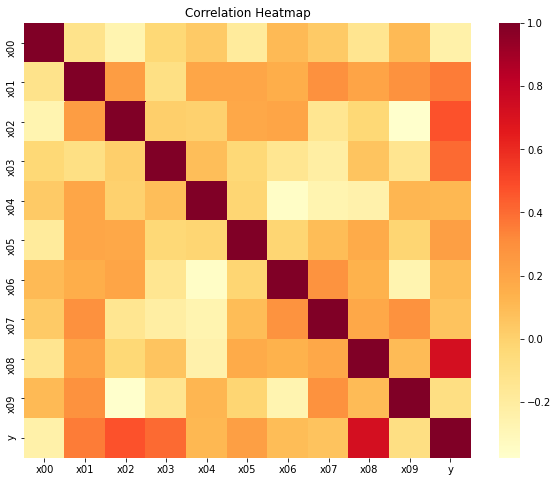

In [6]:
print('Performing Explortory Data Analysis')
# compute correlation matrix and show heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlOrRd")
ax.set_title('Correlation Heatmap')
plt.show()

# if plot_dir specified then save plot to storage
if len(plot_dir) > 0:
    os.makedirs(plot_dir, exist_ok=True)
    plt.savefig(os.path.join(plot_dir, 'correlation_heatmap.png'))

### Train Model

In [7]:
print("training model")
# obtain explanatory variables
explanatory_variables = [x for x in df.columns if x != 'y']
explanatory_variables

training model


['x00', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09']

In [8]:
# Train model
rf = RandomForestRegressor()
rf.fit(df[explanatory_variables], df['y'])

RandomForestRegressor()

### Save trained model object

In [9]:
print("saving model object")
# create driecotry to save model
os.makedirs(model_dir, exist_ok=True)

# save model object
joblib.dump(rf, os.path.join(model_dir, 'model.gz'))

saving model object


['./models/model1/model.gz']

In [10]:
print(f'completed model training for {training_fp}')

completed model training for ./data/train_13.csv
